# Inicio Aula 18

In [1]:
from osgeo import gdal
from gdalconst import *

import os
import sys
import numpy as np
from matplotlib import pyplot as plt

gdal.UseExceptions()

print(gdal.__version__)

2.2.4


In [2]:
os.getcwd()

'C:\\Users\\Victor\\OneDrive - inpe.br\\base_dados\\inpe\\ser347_prog\\aulas\\Aula-18-19-20'

In [3]:
os.chdir(os.path.join(os.getcwd(), 'tif'))
os.getcwd()

'C:\\Users\\Victor\\OneDrive - inpe.br\\base_dados\\inpe\\ser347_prog\\aulas\\Aula-18-19-20\\tif'

In [4]:
filename = os.getcwd() + '\\crop_rapideye.tif'
filename
dataset = gdal.Open(filename, GA_ReadOnly)

In [5]:
filename_erro = filename + '\\teste'
print('Tentar abrir ' + filename_erro)

try:
    dataset = gdal.Open(filename_erro, GA_ReadOnly)
    print('Arquivo aberto com sucesso!')
except:
    print('Erro na abertura do arquivo!')
    
print('Tentar abrir ' + filename)

try:
    dataset = gdal.Open(filename, GA_ReadOnly)
    print('Arquivo aberto com sucesso!')
except:
    print('Erro na abertura do arquivo!')

Tentar abrir C:\Users\Victor\OneDrive - inpe.br\base_dados\inpe\ser347_prog\aulas\Aula-18-19-20\tif\crop_rapideye.tif\teste
Erro na abertura do arquivo!
Tentar abrir C:\Users\Victor\OneDrive - inpe.br\base_dados\inpe\ser347_prog\aulas\Aula-18-19-20\tif\crop_rapideye.tif
Arquivo aberto com sucesso!


In [6]:
geotransform = dataset.GetGeoTransform()
print(geotransform)

(505900.0, 5.0, 0.0, 7858335.0, 0.0, -5.0)


In [7]:
latitude = geotransform[3]
longitude = geotransform[0]
res_x = geotransform[1]
res_y = -geotransform[5]

print('Latitude inicial do dataset:', latitude, '\n''Longitude inicial do dataset:', longitude,
      '\n''Resolução (x) do dataset:', res_x, '\n''Resolução (y) do dataset:', res_y)

Latitude inicial do dataset: 7858335.0 
Longitude inicial do dataset: 505900.0 
Resolução (x) do dataset: 5.0 
Resolução (y) do dataset: 5.0


In [8]:
print(dataset.GetProjectionRef())

PROJCS["WGS 84 / UTM zone 21S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32721"]]


In [9]:
print(dataset.GetProjectionRef())

PROJCS["WGS 84 / UTM zone 21S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32721"]]


In [10]:
linhas = dataset.RasterYSize
colunas = dataset.RasterXSize

print('Número de linhas:', linhas, '\n''Número de colunas:', colunas)

Número de linhas: 1446 
Número de colunas: 2322


In [11]:
bandas = dataset.RasterCount

print('Número de bandas:', bandas)

banda_nir = dataset.GetRasterBand(5)
banda_red = dataset.GetRasterBand(3)

Número de bandas: 5


In [12]:
print('Tipos de dados:',
     '\n'' - banda NIR:', gdal.GetDataTypeName(banda_nir.DataType),
      '\n'' - banda RED:', gdal.GetDataTypeName(banda_red.DataType))

Tipos de dados: 
 - banda NIR: UInt16 
 - banda RED: UInt16


In [13]:
(menor_valor, maior_valor) = banda_red.ComputeRasterMinMax()
print('Menor valor de RED:', menor_valor,
     '\n''Maior valor de RED:', maior_valor)

Menor valor de RED: 0.0 
Maior valor de RED: 20693.0


In [14]:
i = 1

while i <= bandas: 
    (menor_valor, maior_valor) = dataset.GetRasterBand(i).ComputeRasterMinMax()
    print('Mínimos e Máximos da banda', i,
         '\n', (menor_valor, maior_valor))
    i += 1

Mínimos e Máximos da banda 1 
 (0.0, 18559.0)
Mínimos e Máximos da banda 2 
 (0.0, 18851.0)
Mínimos e Máximos da banda 3 
 (0.0, 20693.0)
Mínimos e Máximos da banda 4 
 (0.0, 16055.0)
Mínimos e Máximos da banda 5 
 (0.0, 19273.0)


In [15]:
for i in range(bandas):
    print ("Mínimos e máximos da banda", i + 1)
    print (dataset.GetRasterBand(i + 1).ComputeRasterMinMax())

Mínimos e máximos da banda 1
(0.0, 18559.0)
Mínimos e máximos da banda 2
(0.0, 18851.0)
Mínimos e máximos da banda 3
(0.0, 20693.0)
Mínimos e máximos da banda 4
(0.0, 16055.0)
Mínimos e máximos da banda 5
(0.0, 19273.0)


In [16]:
array_red = banda_red.ReadAsArray()
array_nir = banda_nir.ReadAsArray()

array_ndvi = (array_nir - array_red) / (array_nir + array_red)

print(array_ndvi.shape)

(1446, 2322)


C:\Users\Victor\Anaconda3\envs\ser347\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [17]:
print(array_ndvi)

print(array_ndvi.max())

[[       nan 0.37923773 0.37175174 ... 0.25242873 0.09627142        nan]
 [       nan 0.38945318 0.3834804  ... 0.15248753 0.1180509         nan]
 [       nan 0.36793118 0.32170292 ... 0.16057825 0.23144144        nan]
 ...
 [       nan 0.31742473 0.33133244 ... 0.17206678 0.14445189        nan]
 [       nan 0.2967015  0.30587302 ... 0.14217498 0.10538502        nan]
 [       nan 0.29218509 0.30317551 ... 0.10899723 0.05807927        nan]]
nan


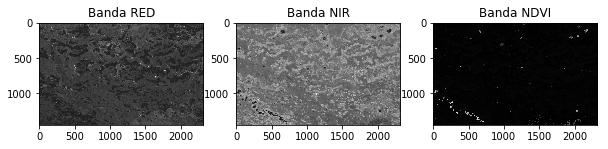

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

plt.subplot(131)
plt.title('Banda RED')
plt.imshow(array_red, cmap='gray')

plt.subplot(132)
plt.title('Banda NIR')
plt.imshow(array_nir, cmap='gray')

plt.subplot(133)
plt.title('Banda NDVI')
plt.imshow(array_ndvi, cmap='gray');

# Inicio Aula 19

In [19]:
filename_crop_1_banda_5 = os.getcwd() + '\\crop-1-band-5.tif'
filename_crop_1_banda_7 = os.getcwd() + '\\crop-1-band-7.tif'
filename_crop_2_banda_5 = os.getcwd() + '\\crop-2-band-5.tif'
filename_crop_2_banda_7 = os.getcwd() + '\\crop-2-band-7.tif'
dataset = gdal.Open(filename, GA_ReadOnly)

try:
    dataset_crop_1_banda_5 = gdal.Open(filename_crop_1_banda_5, GA_ReadOnly)
    print(dataset_crop_1_banda_5.GetGeoTransform())
    
    dataset_crop_1_banda_7 = gdal.Open(filename_crop_1_banda_7, GA_ReadOnly)
    print(dataset_crop_1_banda_7.GetGeoTransform())
    
    dataset_crop_2_banda_5 = gdal.Open(filename_crop_2_banda_5, GA_ReadOnly)
    print(dataset_crop_2_banda_5.GetGeoTransform())
    
    dataset_crop_2_banda_7 = gdal.Open(filename_crop_2_banda_7, GA_ReadOnly)
    print(dataset_crop_2_banda_7.GetGeoTransform())
    
except:
    print('Erro na abertura de algum arquivo!')

(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)
(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)
(584378.0, 2.0, 0.0, 7508152.0, 0.0, -2.0)
(584378.0, 2.0, 0.0, 7508152.0, 0.0, -2.0)


In [20]:
print(dataset_crop_1_banda_5.GetGeoTransform() == dataset_crop_1_banda_7.GetGeoTransform())
print(dataset_crop_2_banda_5.GetGeoTransform() == dataset_crop_2_banda_7.GetGeoTransform())
print(dataset_crop_1_banda_5.GetGeoTransform() == dataset_crop_2_banda_7.GetGeoTransform())

print(dataset_crop_1_banda_5.GetProjectionRef() == dataset_crop_2_banda_5.GetProjectionRef())

True
True
False
True


In [21]:
print(dataset_crop_1_banda_5.RasterCount)
print(dataset_crop_1_banda_7.RasterCount)
print(dataset_crop_2_banda_5.RasterCount)
print(dataset_crop_2_banda_7.RasterCount)

1
1
1
1


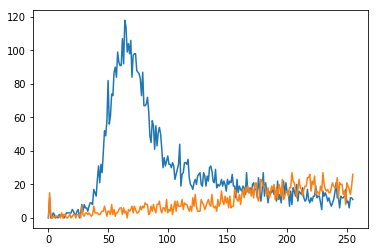

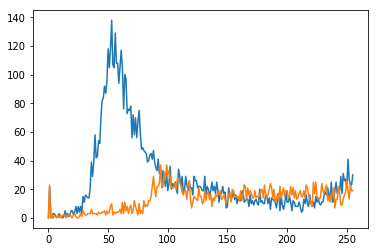

In [22]:
crop_1_banda_5 = dataset_crop_1_banda_5.GetRasterBand(1)
crop_1_banda_7 = dataset_crop_1_banda_7.GetRasterBand(1)
crop_2_banda_5 = dataset_crop_2_banda_5.GetRasterBand(1)
crop_2_banda_7 = dataset_crop_2_banda_7.GetRasterBand(1)

plt.plot(crop_1_banda_5.GetHistogram())
plt.plot(crop_1_banda_7.GetHistogram())
plt.show()

plt.plot(crop_2_banda_5.GetHistogram())
plt.plot(crop_2_banda_7.GetHistogram())
plt.show()

In [23]:
numpy_crop_1_banda_5 = crop_1_banda_5.ReadAsArray()
numpy_crop_1_banda_7 = crop_1_banda_7.ReadAsArray()
numpy_crop_2_banda_5 = crop_2_banda_5.ReadAsArray()
numpy_crop_2_banda_7 = crop_2_banda_7.ReadAsArray()

print(numpy_crop_1_banda_5.shape)
print(numpy_crop_1_banda_7.shape)
print(numpy_crop_2_banda_5.shape)
print(numpy_crop_2_banda_7.shape)

(400, 400)
(400, 400)
(400, 400)
(400, 400)


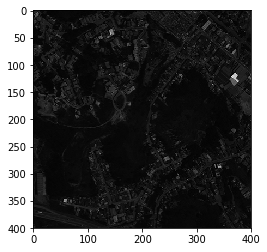

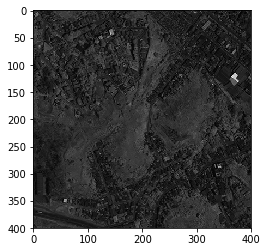

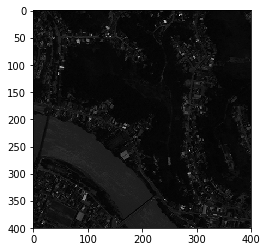

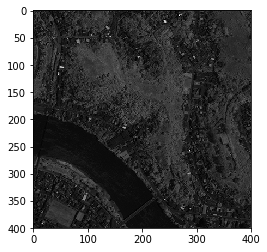

In [24]:
plt.imshow(numpy_crop_1_banda_5, cmap = 'gray')
plt.show()
plt.imshow(numpy_crop_1_banda_7, cmap = 'gray')
plt.show()
plt.imshow(numpy_crop_2_banda_5, cmap = 'gray')
plt.show()
plt.imshow(numpy_crop_2_banda_7, cmap = 'gray')
plt.show()

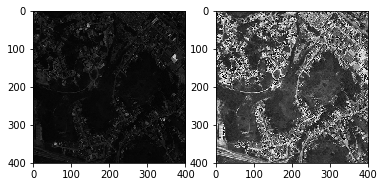

In [25]:
plt.subplot(121)
plt.imshow(numpy_crop_1_banda_5, cmap = 'gray')
plt.subplot(122)
plt.imshow(numpy_crop_1_banda_5 * 200, cmap = 'gray')
plt.show()

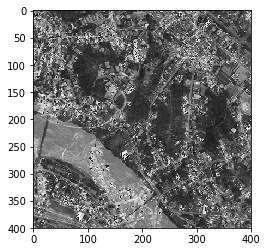

In [26]:
plt.imshow(100 * (numpy_crop_1_banda_5 + numpy_crop_2_banda_5), cmap = 'gray')
plt.show()

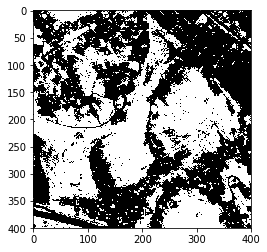

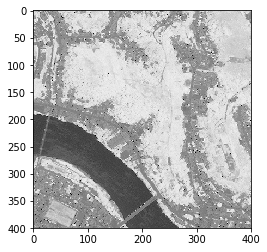

In [27]:
crop_1_ndvi = (numpy_crop_1_banda_7.astype(float) - numpy_crop_1_banda_5.astype(float)) / (numpy_crop_1_banda_7.astype(float) + numpy_crop_1_banda_5.astype(float))

plt.imshow(crop_1_ndvi > 0.5, cmap = 'gray')
plt.show()

crop_2_ndvi = (numpy_crop_2_banda_7.astype(float) - numpy_crop_2_banda_5.astype(float)) / (numpy_crop_2_banda_7.astype(float) + numpy_crop_2_banda_5.astype(float))

plt.imshow(crop_2_ndvi, cmap = 'gray')
plt.show()

# Inicio Aula 20

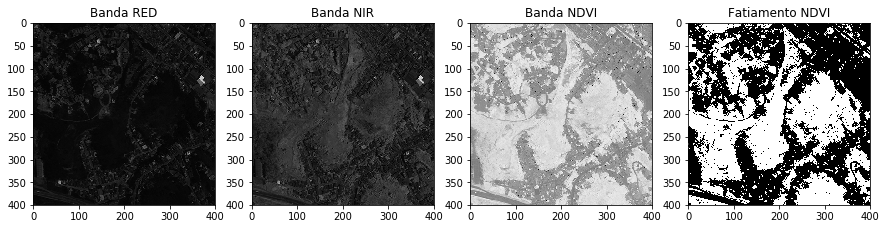

In [28]:
filename_crop_1_banda_5 = os.getcwd() + '\\crop-1-band-5.tif'
filename_crop_1_banda_7 = os.getcwd() + '\\crop-1-band-7.tif'

try:
    dataset_crop_1_banda_5 = gdal.Open(filename_crop_1_banda_5, GA_ReadOnly)
    dataset_crop_1_banda_7 = gdal.Open(filename_crop_1_banda_7, GA_ReadOnly)
except:
    print('Erro de abertura em algum arquivo!')
    
crop_1_banda_5 = dataset_crop_1_banda_5.GetRasterBand(1)
crop_1_banda_7 = dataset_crop_1_banda_7.GetRasterBand(1)
    
numpy_crop_1_banda_5 = crop_1_banda_5.ReadAsArray()
numpy_crop_1_banda_7 = crop_1_banda_7.ReadAsArray()    

crop_1_ndvi = (numpy_crop_1_banda_7.astype(float) - numpy_crop_1_banda_5.astype(float)) / (numpy_crop_1_banda_7.astype(float) + numpy_crop_1_banda_5.astype(float))

plt.figure(figsize = (15, 5))

plt.subplot(141)
plt.title('Banda RED')
plt.imshow(numpy_crop_1_banda_5, cmap='gray')

plt.subplot(142)
plt.title('Banda NIR')
plt.imshow(numpy_crop_1_banda_7, cmap='gray')

plt.subplot(143)
plt.title('Banda NDVI')
plt.imshow(crop_1_ndvi, cmap='gray')

fat_ndvi = crop_1_ndvi > 0.5

plt.subplot(144)
plt.title('Fatiamento NDVI')
plt.imshow(fat_ndvi, cmap='gray');

In [29]:
def salvar_banda(matriz_de_pixels, nome_do_arquivo, dataset_de_referencia):
    # obter metadados
    linhas = dataset_de_referencia.RasterYSize
    colunas = dataset_de_referencia.RasterXSize
    bandas = 1
    # definir driver
    driver = gdal.GetDriverByName('GTiff')
    # copiar tipo de dados da banda já existente
    data_type = dataset_de_referencia.GetRasterBand(1).DataType
    # criar novo dataset
    dataset_output = driver.Create(nome_do_arquivo, colunas, linhas, bandas, data_type)
    # copiar informações espaciais da banda já existente
    dataset_output.SetGeoTransform(dataset_de_referencia.GetGeoTransform())
    # copiar informações de projeção
    dataset_output.SetProjection(dataset_de_referencia.GetProjectionRef())
    # escrever dados da matriz NumPy na banda
    dataset_output.GetRasterBand(1).WriteArray(matriz_de_pixels)
    # salvar valores
    dataset_output.FlushCache()
    # fechar dataset
    dataset_output = None

In [30]:
filename_output = os.getcwd() + '\\crop-1-ndvi-threshold.tif'

salvar_banda(fat_ndvi, filename_output, dataset_crop_1_banda_5)

In [31]:
linhas = dataset_crop_1_banda_5.RasterYSize
colunas = dataset_crop_1_banda_5.RasterXSize
bandas = dataset_crop_1_banda_5.RasterCount

filename_output = os.getcwd() + '\\crop-1-ndvi-threshold.tif'

driver = gdal.GetDriverByName('GTiff')

data_type = crop_1_banda_5.DataType

dataset_output = driver.Create(filename_output, colunas, linhas, bandas, data_type)

dataset_output.SetGeoTransform(dataset_crop_1_banda_5.GetGeoTransform())

dataset_output.SetProjection(dataset_crop_1_banda_5.GetProjectionRef())

dataset_output.GetRasterBand(1).WriteArray(fat_ndvi)

dataset_output.FlushCache()

dataset_output = None

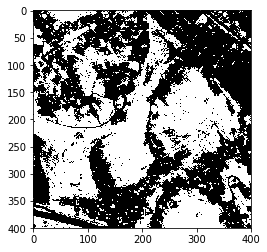

In [32]:
plt.imshow(fat_ndvi, cmap = 'gray')
plt.show()

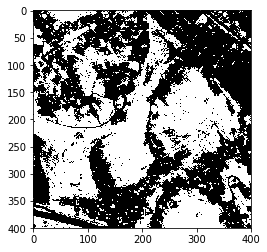

In [33]:
filename_crop_1_fat_ndvi = os.getcwd() + '\\crop-1-ndvi-threshold.tif'

try:
    dataset_crop_1_fat_ndvi = gdal.Open(filename_crop_1_fat_ndvi, GA_ReadOnly)
except:
    print('Erro de abertura em algum arquivo!')
    
crop_1_fat_ndvi = dataset_crop_1_fat_ndvi.GetRasterBand(1)
    
numpy_crop_1_fat_ndvi = crop_1_fat_ndvi.ReadAsArray()

plt.imshow(numpy_crop_1_fat_ndvi, cmap = 'gray')
plt.show()

In [41]:
arquivo = str(input('Adicione endereço do arquivo com nome e extensão, sem aspas e com barra simples \:'))

Adicione endereço do arquivo com nome e extensão, sem aspas e com barra simples \:C:\Users\Victor\OneDrive - inpe.br\base_dados\inpe\ser347_prog\aulas\Aula-18-19-20\tif\crop-1-ndvi-1.tif


In [42]:
arquivo

'C:\\Users\\Victor\\OneDrive - inpe.br\\base_dados\\inpe\\ser347_prog\\aulas\\Aula-18-19-20\\tif\\crop-1-ndvi-1.tif'

In [43]:
salvar_banda(fat_ndvi, arquivo, dataset_crop_1_banda_5)

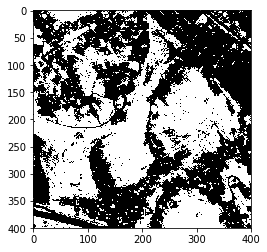

In [44]:
filename_crop_1_fat_ndvi = os.getcwd() + '\\crop-1-ndvi-threshold.tif'

try:
    dataset_crop_1_fat_ndvi = gdal.Open(filename_crop_1_fat_ndvi, GA_ReadOnly)
except:
    print('Erro de abertura em algum arquivo!')
    
crop_1_fat_ndvi = dataset_crop_1_fat_ndvi.GetRasterBand(1)
    
numpy_crop_1_fat_ndvi = crop_1_fat_ndvi.ReadAsArray()

plt.imshow(numpy_crop_1_fat_ndvi, cmap = 'gray')
plt.show()